In [ ]:
# Basic Library
import pandas as pd 
import numpy as np 

# Library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

# Library untuk MBA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
# Import data dari Kaggle

!wget -O supermarket.csv https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/supermarket_sales%20-%20Sheet1.csv

--2021-10-17 03:43:13--  https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/supermarket_sales%20-%20Sheet1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131528 (128K) [text/plain]
Saving to: ‘supermarket.csv’

supermarket.csv     100%[===================>] 128.45K  --.-KB/s    in 0.02s   

2021-10-17 03:43:13 (5.84 MB/s) - ‘supermarket.csv’ saved [131528/131528]



**General Insight**

In [ ]:
#Menampilkan Data

df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
  #For Search duplicate Row

  df.duplicated().sum()

0

In [ ]:
#For Search Missing value from data

df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**Analysis Next Step**

In [ ]:
#Menghitung gender dari data

df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
# Membuat dummies dari gender

gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
#Menampilkan Table berdasarkan Gender

df=pd.concat([df,gender_dummies],axis=1)
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0


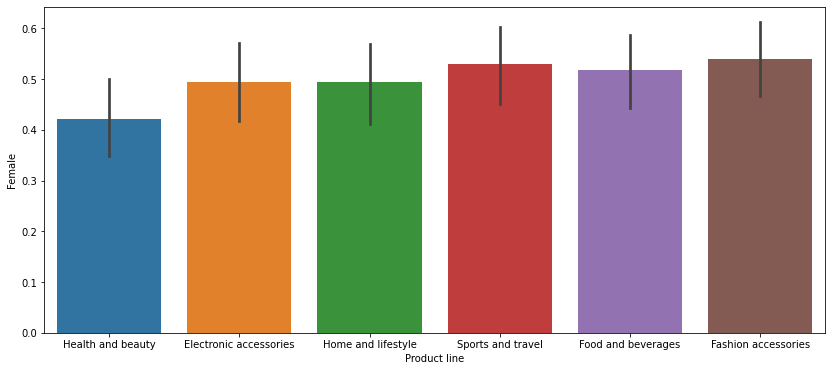

In [ ]:
#Menampilkan Grafik dari Gender Perempuan

plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Female',data=df)

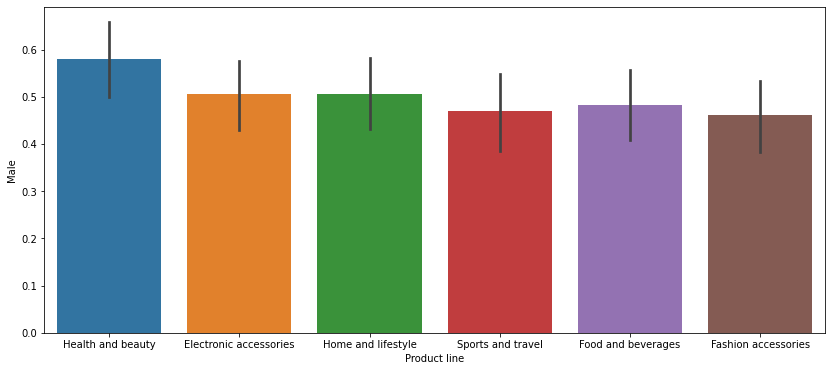

In [ ]:
# Menampilkan Grafik dari gender Laki- Laki

plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Male',data=df)

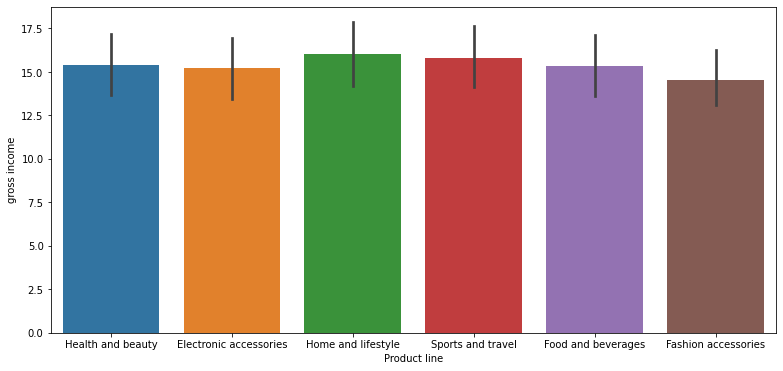

In [ ]:
#Mencari Gross Income tertinggi dari Penjualan

plt.figure(figsize=(13,6))
sns.barplot(x="Product line",y="gross income",data=df)

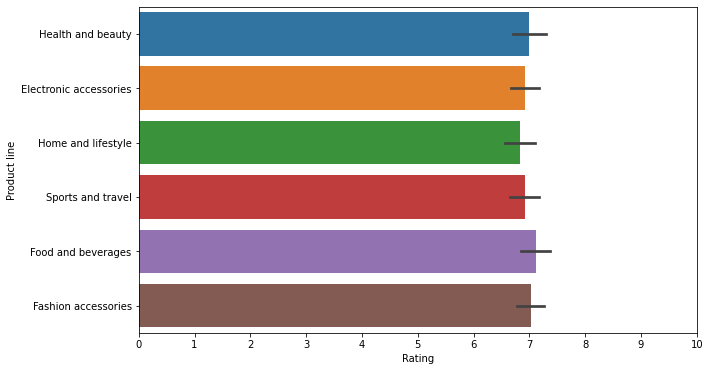

In [ ]:
# Mencari Rating dari Jenis Produk

xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))
sns.barplot(y=df['Product line'],x=df['Rating'])
plt.xticks(xdata)
plt.show()

In [ ]:
#Menampilkan Quantity

dv=pd.DataFrame(df['Quantity'].value_counts())
dv

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


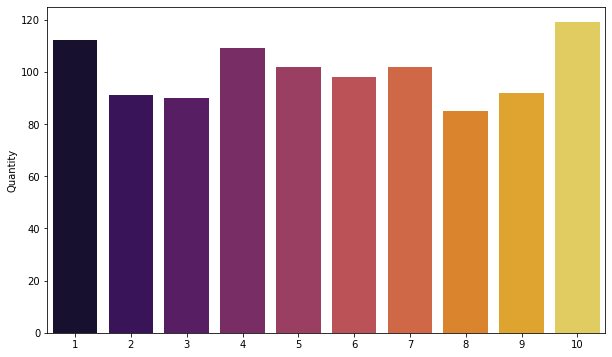

In [ ]:
#Menampilkan Grafik dari Kuantitas

plt.figure(figsize=(10,6))
sns.barplot(x=dv.index,y=dv['Quantity'],palette='inferno')

**Insight Dari data diatas**

* Total Customers = 1000
* Total Females = 501
* Total Males = 499
* Min Rating = 4
* Max Rating = 10
* Average Rating = 6.97
* Best Average Rating in Food & Beverages
* Max Average Gross Income in Home & Lifestyle
* Min Average Gross Income in Fashion Accessories
* Maximum customers buys 10 quantities
* Max Average total bill in Home and lifestyle
* Min Average total bill in Fashion Accessories
* Maximum People pays through e-wallet
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories is from Females
* Max Average Sales of Health & Beauty is from Males




---


---



---



---



**Payment Section**

In [ ]:
#Show index/ jenis jenis dari Payment

df['Payment'].value_counts().keys()

Index(['Ewallet', 'Cash', 'Credit card'], dtype='object')

In [ ]:
#Cek seberapa banyak pelanggan menggunakan masing-masing metode Payment

df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

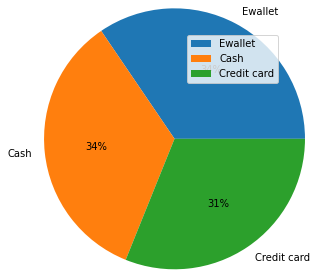

In [ ]:
#Menampilkan Pie Chart dari masing masing Payment

plt.pie(df['Payment'].value_counts(),labels=df['Payment'].value_counts().keys(),autopct='%1.0f%%',radius=1.5)
plt.legend()
plt.show()

In [ ]:
#Menampilkan rata-rata Kuantitas Pembelian dari masing-masing payment

df.groupby('Payment')['Quantity'].mean()

Payment
Cash           5.511628
Credit card    5.536977
Ewallet        5.484058
Name: Quantity, dtype: float64

In [ ]:
#Menampilkan mean dari masing masing metode payment

df.groupby('Payment')['Total'].mean()

Payment
Cash           326.181890
Credit card    324.009878
Ewallet        318.820600
Name: Total, dtype: float64

**Insight Dari Payment diatas**

* Tidak ada perbedaan antara kuantitas pada masing masing jumlah pembayaran
* Tidak ada perbedaan yang mencolok terhadap total uang yang digunakan dalam setiap metode pembayaran




---



---



---



**Customer Type**

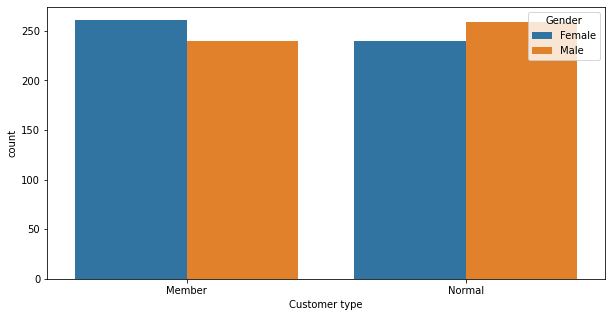

In [ ]:
#Menampilkan Grafik berdasarkan Customer Type dan Gender

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.countplot(x = 'Customer type',hue='Gender',data=df)

In [ ]:
#Menampilkan Gross income dari Tipe Customer

df.groupby('Customer type')['gross income'].sum()

Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64

In [ ]:
# Menampilkan Pembayar Pajak terbanyak pada tipe Customer

df.groupby('Customer type')['Tax 5%'].sum()

Customer type
Member    7820.164
Normal    7559.205
Name: Tax 5%, dtype: float64

**Insight dari Costumer Type**

* Perempuan lebih banyak sebagai customer membership daripada laki laki
* Pemasukan dari membership customer lebih banyak dari customer biasa, maka dari itu supermarket harus memperbanyak promo untuk mendapatkan membership baru
* Dan juga sudah sangat jelas bahwa customer membership lebih banyak membayar pajak dari customer biasa




---


---



---



**Branch and City Type**

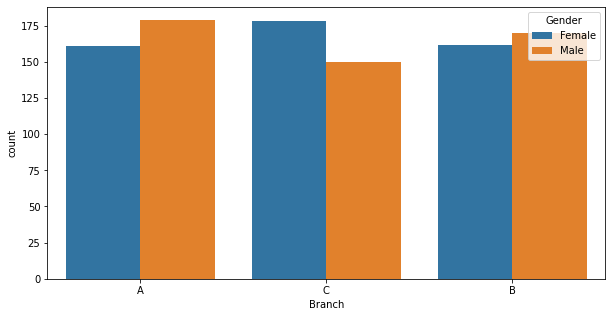

In [ ]:
#Membandingkan Jumlah customer berdasarkan gender yang datang di tiap branch

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.countplot(x='Branch',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


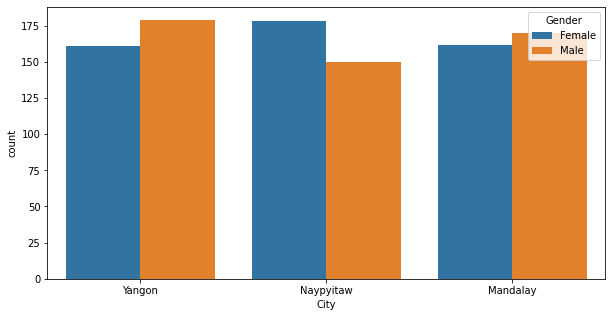

In [ ]:
#Membandingkan Jumlah customer berdasarkan gender yang datang di tiap kota

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.countplot(df['City'],hue=df['Gender'])

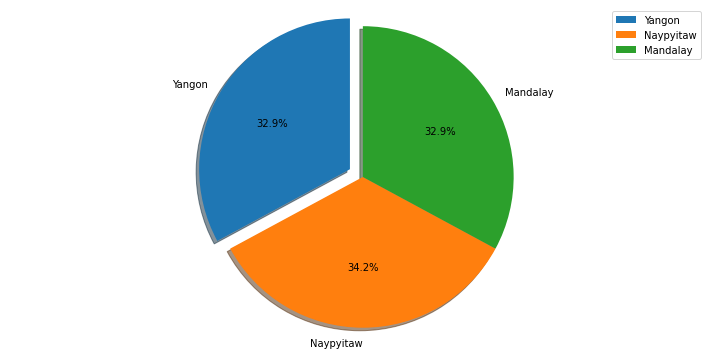

In [ ]:
#Menampilkan Kota dengan pendapatan tertinggi

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df.groupby('City')['gross income'].sum(),explode=explode, labels=df['City'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal digunakan agar pie chart berbentuk lingkaran
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Menampilkan Total Quantitas Pembelian di setiap branch

df.groupby('City')['Quantity'].sum()

City
Mandalay     1820
Naypyitaw    1831
Yangon       1859
Name: Quantity, dtype: int64

In [ ]:
#Menampilkan rata-rata Rating yang diberikan Pelanggan pada setiap branch

df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

**Insight Dari Branch Type**

* Pada branch C pembeli perempuan lebih banyak, sehingga jika branch C difokuskan ke pembeli perempuan maka akan lebih meraup banyak keuntungan
* Kemudian Kota Napyitaw menghasilkan keuntungan sedikit lebih banyak dari yang lain
* Branch C mendapatkan penilaian paling buruk dari yang lain, sehingga branch C harus memperbaiki kinerjanya




---


---



---



**Rule Based Persona**

In [ ]:
# Mendefinisikan Kategori features dengan function

def grab_cat_names(dataframe, cat_th = 10, car_th = 20):

  # Masukan Semua Kolom Kategori  
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']  

 #Masukan jenis data non-categoric dengan unique value dibawah 10   

    num_but_cat =  [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                    dataframe[col].dtypes != 'O' ]

 # Masukan jenis data kategorik dengan unique values lebih dari 20   
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']      

 # Masukan Semua jenis data dari kolom categorical dan non-categorical dengan unique values kurang dari 10   
    final_cat_cols = cat_cols + num_but_cat   
    
 # Tanpa variable cat_but_car
    final_cat_cols =  [col for col in final_cat_cols if col not in cat_but_car]   
    return  cat_cols, num_but_cat, cat_but_car, final_cat_cols

cat_cols, num_but_cat, cat_but_car, final_cat_cols = grab_cat_names(df)


In [ ]:
# Menampilkan semua coloumn 
cat_cols

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [ ]:
# Menampilkan data non kategori 
num_but_cat

['gross margin percentage', 'Female', 'Male']

In [ ]:
# Menampilkan jenis data kategorik
cat_but_car

['Invoice ID', 'Date', 'Time']

In [ ]:
# Menampilkan semua data dari jenis kategori dan non-kategori
final_cat_cols

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment',
 'gross margin percentage',
 'Female',
 'Male']

In [ ]:
final_cat_cols=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [ ]:
# Memasukan data kategorik yang telah dipilih dimbah total revenue dan rating

agg_df = df.groupby(by=['Branch', 'City', 'Customer type',
                          'Gender', 'Product line', 'Payment', 'Rating']).\
                          agg({"Total" : "sum"}).sort_values("Total", ascending=False)
agg_df.head()

Total
Branch City      Customer type Gender Product line        Payment     Rating           
B      Mandalay  Member        Male   Health and beauty   Credit card 8.4     1572.7005
                 Normal        Male   Health and beauty   Ewallet     5.1     1199.7720
                               Female Home and lifestyle  Ewallet     4.4     1107.1200
C      Naypyitaw Member        Female Fashion accessories Credit card 6.6     1042.6500
A      Yangon    Normal        Male   Fashion accessories Credit card 8.7     1039.2900

**ARIMA**

In [ ]:
#Merubah Tipe data Date 

df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0


In [ ]:
yangon = df.loc[df['City'] == 'Yangon']
yangon.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,1,0


In [ ]:
#Membuang seluruh rows dan hanya mengambil data date dan Total

r_col = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Female', 'Male']


yangon.drop(r_col, axis =1 , inplace=True)
yangon.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Total,Date
0,548.9715,2019-01-05
2,340.5255,2019-03-03
3,489.0480,2019-01-27
4,634.3785,2019-02-08
6,433.6920,2019-02-25


In [ ]:
#Merapikan bentuk table dan mensortir berdasarkan tanggal

yangon = yangon[["Date","Total"]].sort_values('Date')
yangon.head()

,Date,Total
696,2019-01-01,113.568
245,2019-01-01,399.756
567,2019-01-01,621.243
17,2019-01-01,457.443
829,2019-01-01,779.310


In [ ]:
# Untuk memasukan hasil sorting kedalam table yangon

yangon.set_index('Date', inplace=True)
yangon

,Total
Date,
2019-01-01,113.5680
2019-01-01,399.7560
2019-01-01,621.2430
2019-01-01,457.4430
2019-01-01,779.3100
...,...
2019-03-29,228.1230
2019-03-30,469.7700
2019-03-30,216.8460


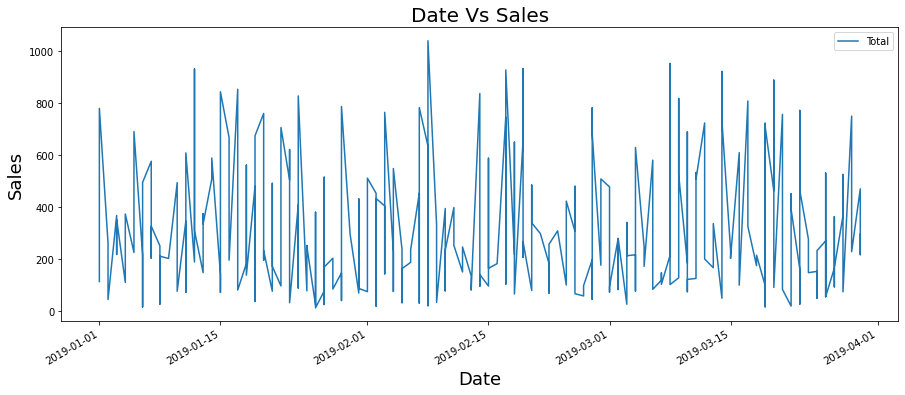

In [ ]:
# Membuat grafik dari yangob

yangon.plot(figsize=(15,6),legend=True)
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.title("Date Vs Sales",fontsize=20)
plt.show()

**Test Stationary**

In [ ]:
#Import Library untuk testing

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result = adfuller(yangon['Total'])
test_result

(-18.713510280720463,
 2.034195712964938e-30,
 0,
 339,
 {'1%': -3.4497880749874628,
  '10%': -2.571332495975496,
  '5%': -2.870103829170425},
 4427.586483799787)

**We're using Dickey Fuller Test here to test for stationarity. The Dickey Fuller Test gives us 5 values, namely - ADF Test Statitic, p-value, #Lags used & Number of Observations used. However, our main focus here is on the p-value.**
.

.













We are assuming our H0 as "Our data is not stationary" and H1 as "Our data is stationary".

.

.









From the above 5 values, we see that our p-value is 2.034195712964938e-30 which is 0.000000000000000000000000000002034195712964938 in real numbers. Therefore, we can see that our p-value is less than 0.05 and hence we cannot accept our null hypothesis and that the data is stationary.

**Resampling Data**

In [ ]:
#Resampling the data using Calender Day Frequency and taking their average
yangon = yangon['Total'].resample('D').mean()
yangon.head()
# D = Calendar Day frequency

Date
2019-01-01    474.26400
2019-01-02    153.52575
2019-01-03    312.46950
2019-01-04    241.63125
2019-01-05    404.90100
Freq: D, Name: Total, dtype: float64

In [ ]:
# Import Libray

import statsmodels.api as sm
from pylab import rcParams as rc


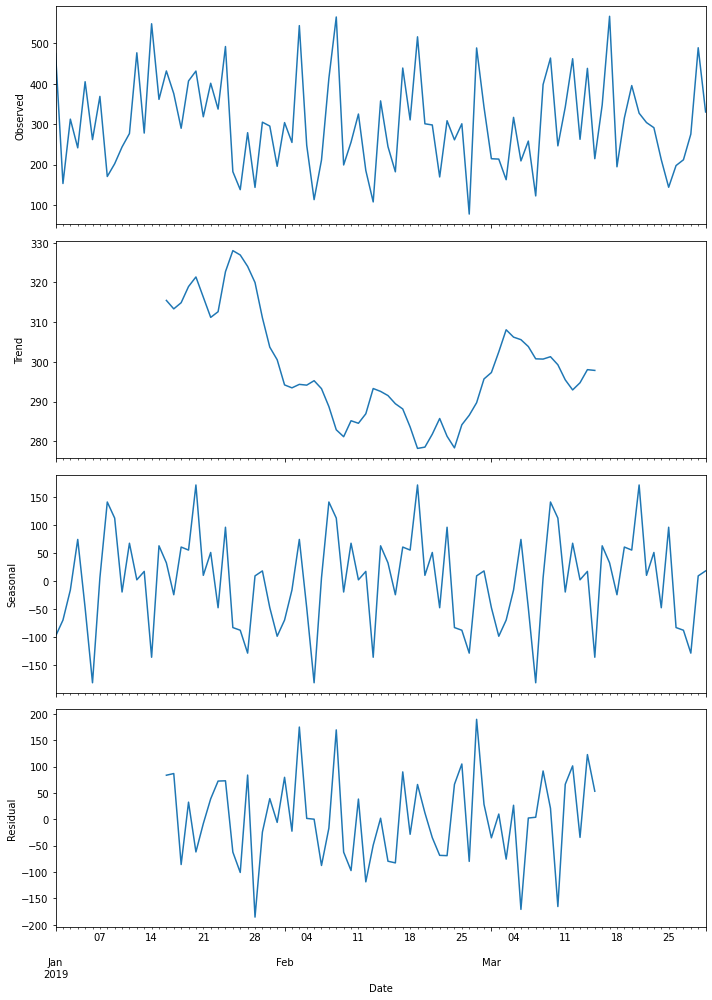

In [ ]:
rc['figure.figsize'] = 10, 14
decomposition = sm.tsa.seasonal_decompose(yangon,model='additive', freq=30)

#Finding trend,seasonal,observed and residual values
fig = decomposition.plot()
plt.show()
# y(t) = Level + Trend + Seasonality + Noise --> Additive

**Forecasting with Arima**

In [ ]:
# Import Library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

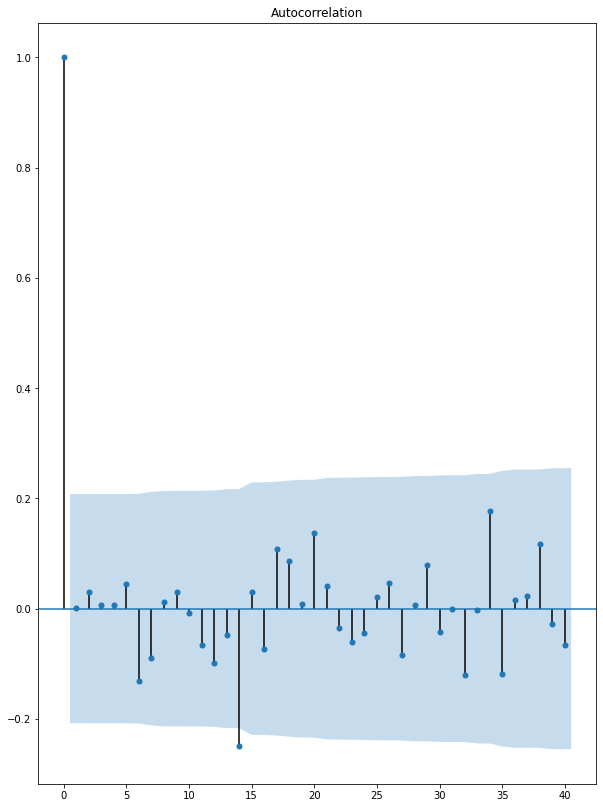

In [ ]:
fig = sm.graphics.tsa.plot_acf(yangon, lags=40)

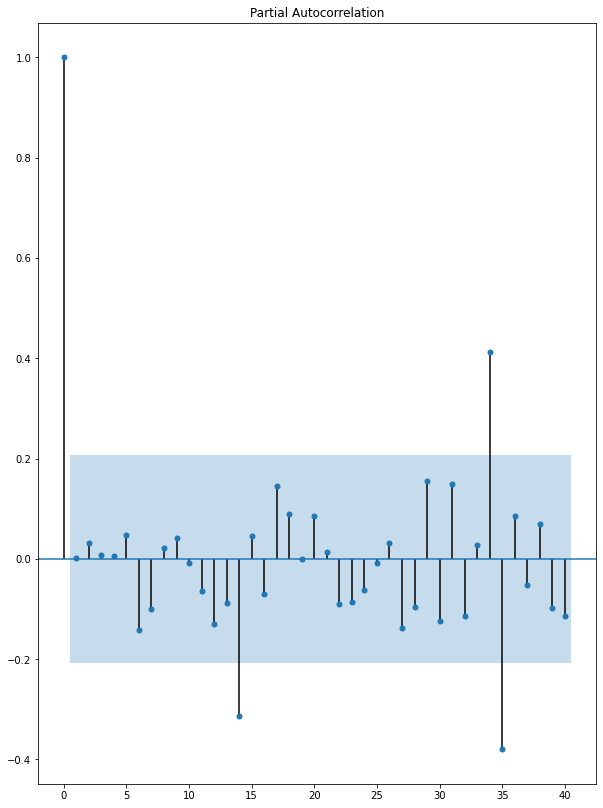

In [ ]:
fig = sm.graphics.tsa.plot_pacf(yangon, lags=40)

In [ ]:
p=d=q=range(0,2)
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [ ]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yangon,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 1268.479050622681
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1060.634308829041
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 1001.7140380352396
ARIMA(0, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 812.078415674389
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 1011.0389629292398
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 969.5012887375198
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 836.4208813787811
ARIMA(0, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 813.0990512243527
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 1200.7139050206024
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 1019.4304477214064
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 985.613964285467
ARIMA(0, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 800.4399802017226
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 1011.7301409283691
ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 957.2214485153137
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 838.1879348450053
ARIMA(0, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 801.4092204435947
ARIMA(0, 1, 0) x (0, 

In [ ]:
mod = sm.tsa.statespace.SARIMAX(yangon,
                               order=(1,0,1),
                               seasonal_order= (1,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7799      0.291     -2.678      0.007      -1.351      -0.209
ma.L1          0.8661      0.252      3.432      0.001       0.371       1.361
ar.S.L12      -0.1447      0.180     -0.804      0.421      -0.498       0.208
ma.S.L12      -0.7988      0.352     -2.271      0.023      -1.488      -0.109
sigma2       1.52e+04   4263.273      3.565      0.000    6841.570    2.36e+04


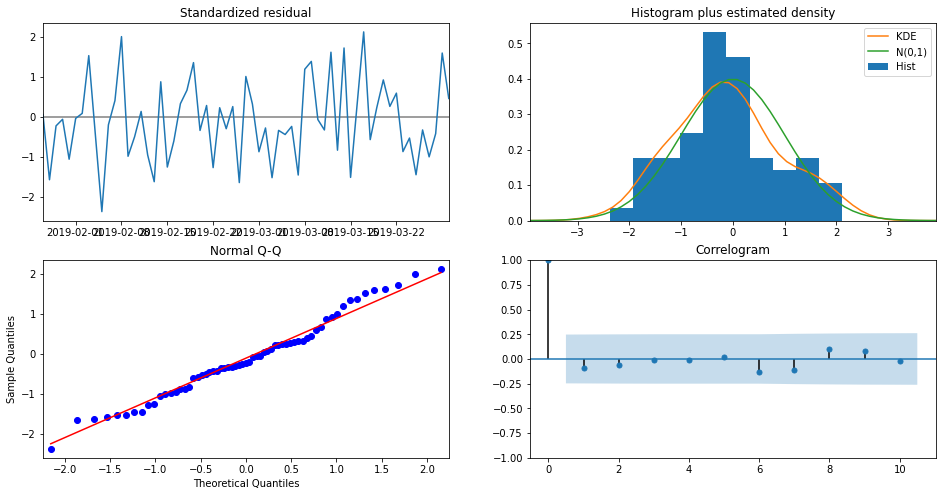

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

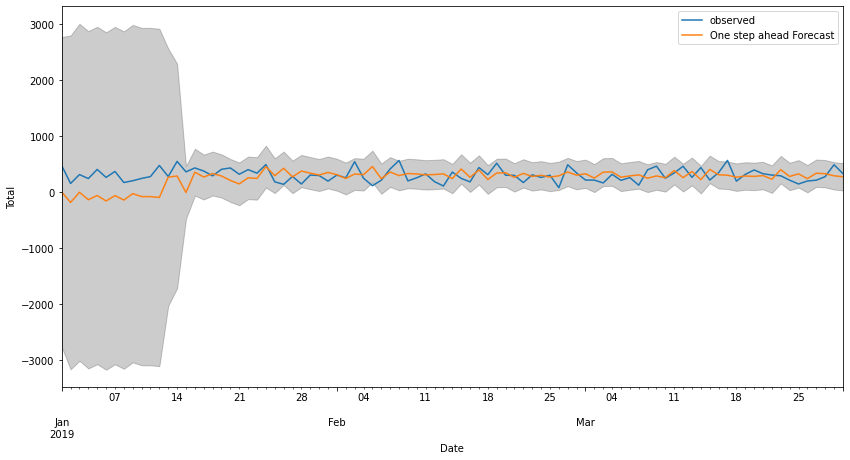

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = yangon['2019':].plot(label= 'observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 7, figsize= (14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total')
plt.legend()

plt.show()

In [ ]:
yangon_forecasted = pred.predicted_mean
yangon_truth = yangon['2019-01-01':]
mse = ((yangon_forecasted - yangon_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :38326.08


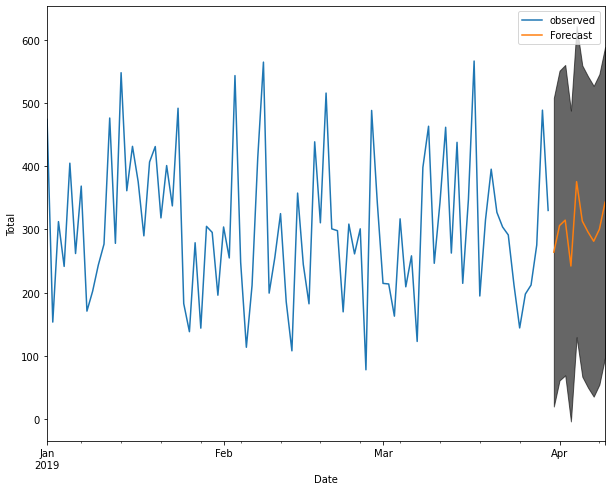

In [ ]:
#Menggunakan 10 steps untuk memprediksi 10 hari kedepan

pred_uc = results.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = yangon.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.legend()
plt.show()

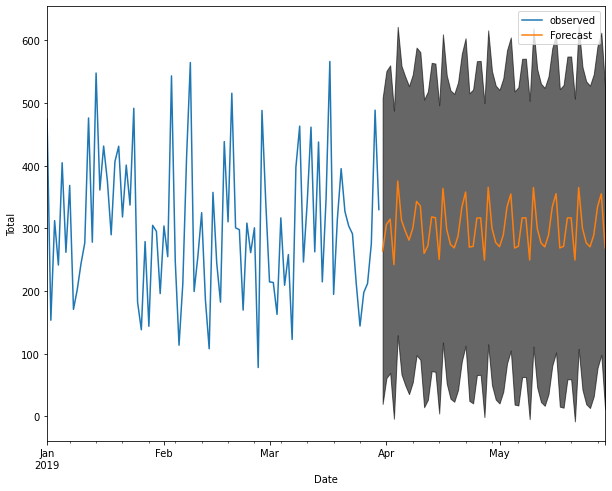

In [ ]:
# Menganlisa Dengan 60 Steps atau 2 bulan

pred_uc = results.get_forecast(steps = 60)
pred_ci = pred_uc.conf_int()

ax = yangon.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.legend()
plt.show()

# Finding Perfect Model

**Data Preparation**

In [ ]:
#Merubah tipe data Date menjadi Int

df['Date']=df['Date'].apply(lambda x: x.toordinal())

In [ ]:
#Menghapus Kolom Female dan Male

df.drop(['Female','Male'], axis=1, inplace=True)


In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Mengencode Data Kategorikal

list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,737064,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,737126,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,737121,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,737086,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,737098,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,737088,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,737120,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,737099,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,737112,261,0,65.82,4.761905,3.2910,4.1


**Splitting Data**

In [ ]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,737064,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,737126,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,737121,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,737086,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,737098,29,2,604.17,4.761905,30.2085,5.3


**1. KNN**

By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       100
           1       0.47      0.47      0.47       100

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[48 52]
 [53 47]]
Training Score:
 64.5


**2. SVC**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200

Confusion Matrix:
 [[100   0]
 [100   0]]
Training Score:
 50.125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3. Naive Bayes**

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.35      0.42       100
           1       0.51      0.67      0.58       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[35 65]
 [33 67]]
Training Score:
 54.25


**4. Decision Tree Classifier**

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62       100
           1       0.61      0.48      0.54       100

    accuracy                           0.58       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.58      0.58       200

Confusion Matrix:
 [[69 31]
 [52 48]]
Training Score:
 69.125


**5. Random Forest Classifier**

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50       100
           1       0.50      0.51      0.51       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[50 50]
 [49 51]]
Training Score:
 100.0


**6. AdaBoost Classifier**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50       100
           1       0.49      0.48      0.49       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[51 49]
 [52 48]]
Training Score:
 66.625


**7. Gradient Boosting Classifier**

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.42      0.44       100
           1       0.47      0.52      0.50       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[42 58]
 [48 52]]
Training Score:
 86.75


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,1
859,0,0
298,1,1
553,1,0
672,0,0
...,...,...
679,1,0
722,1,1
215,1,1
653,1,0


**8. XGB Classifier**

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[04:04:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 78.75


 **9. Extra Trees Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [ ]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       100
           1       0.50      0.51      0.50       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[48 52]
 [49 51]]
Training Score:
 100.0


**10. Bagging Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.53

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,1
859,0,0
298,1,1
553,1,0
672,0,1
...,...,...
679,1,0
722,1,1
215,1,0
653,1,0


We got a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.

The accuracy of other models can be increased further by HyperTuning.